In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
sample_sub = pd.read_csv('sample_submission.csv')

## Data exploration

In [3]:
df_train

,station_id,Aluminium_2019,Aluminium_2020,Ammonium_2019,Ammonium_2020,Boron_2019,Boron_2020,Chloride_2019,Chloride_2020,Coli-like-bacteria-Colilert_2019,...,Taste-ball-units_2020,Taste-dilution-degree_2019,Taste-dilution-degree_2020,Turbidity-NTU_2019,Turbidity-NTU_2020,pH _2019,pH _2020,compliance_2019,compliance_2020,compliance_2021
0,487,NaN,NaN,0.05,0.05,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,1.6,0.2,7.80,7.60,0,0,0
1,1555,NaN,NaN,0.05,0.05,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,1.0,7.30,7.10,0,0,0
2,205,NaN,10.0,0.05,0.24,NaN,0.100,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,1.0,7.80,7.70,0,0,0
3,1228,NaN,NaN,0.09,0.05,0.641,0.932,NaN,NaN,NaN,...,1.0,NaN,NaN,0.5,0.5,7.44,7.58,0,0,0
4,470,NaN,NaN,0.06,0.05,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,0.2,44.0,7.70,8.00,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,830,NaN,NaN,0.36,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,1.0,2.0,1.0,1.0,7.60,7.70,0,0,1
436,803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,1.0,7.00,7.50,0,0,0
437,1081,NaN,5.0,NaN,0.27,NaN,0.274,NaN,14.0,0.0,...,NaN,4.0,NaN,11.0,11.0,7.60,7.60,1,1,1
438,458,NaN,NaN,0.05,0.05,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,0.8,0.3,8.20,8.00,1,0,0


In [4]:
df_train.describe()

,station_id,Aluminium_2019,Aluminium_2020,Ammonium_2019,Ammonium_2020,Boron_2019,Boron_2020,Chloride_2019,Chloride_2020,Coli-like-bacteria-Colilert_2019,...,Taste-ball-units_2020,Taste-dilution-degree_2019,Taste-dilution-degree_2020,Turbidity-NTU_2019,Turbidity-NTU_2020,pH _2019,pH _2020,compliance_2019,compliance_2020,compliance_2021
count,440.000000,103.000000,94.000000,307.000000,290.000000,116.000000,108.000000,111.000000,114.000000,125.000000,...,103.000000,305.000000,306.000000,419.000000,426.000000,432.000000,438.000000,440.000000,440.000000,440.000000
mean,847.884091,16.932117,10.102528,0.139752,0.132352,0.321819,0.497083,68.046847,66.514912,20.708800,...,0.524272,1.596721,1.650327,1.404081,1.395329,7.586852,7.652922,0.197727,0.200000,0.150000
std,482.227347,73.882649,12.298492,0.294113,0.236251,0.423732,0.939406,95.549023,84.631374,216.467309,...,0.639311,1.540460,1.429874,3.183978,2.982040,0.303888,0.315106,0.398739,0.400455,0.357478
min,165.000000,0.002000,0.002000,0.027000,0.020000,0.002000,0.009000,1.000000,0.700000,0.000000,...,0.000000,1.000000,1.000000,0.180000,0.140000,6.500000,6.600000,0.000000,0.000000,0.000000
25%,460.500000,5.000000,5.000000,0.050000,0.050000,0.100000,0.100000,4.900000,10.125000,0.000000,...,0.000000,1.000000,1.000000,0.960000,0.850000,7.400000,7.400000,0.000000,0.000000,0.000000
50%,741.000000,10.000000,5.000000,0.050000,0.050000,0.178500,0.252500,21.500000,31.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,7.600000,7.600000,0.000000,0.000000,0.000000
75%,1174.000000,10.000000,10.000000,0.140000,0.140000,0.403500,0.598500,99.500000,98.475000,0.000000,...,1.000000,2.000000,2.000000,1.000000,1.000000,7.800000,7.900000,0.000000,0.000000,0.000000
max,2311.000000,754.000000,76.900000,3.500000,3.300000,3.700000,7.700000,461.000000,468.000000,2419.600000,...,3.000000,16.000000,16.000000,50.000000,44.000000,8.640000,8.470000,1.000000,1.000000,1.000000


In [5]:
df_train.isna().sum()

station_id                            0
Aluminium_2019                      337
Aluminium_2020                      346
Ammonium_2019                       133
Ammonium_2020                       150
Boron_2019                          324
Boron_2020                          332
Chloride_2019                       329
Chloride_2020                       326
Coli-like-bacteria-Colilert_2019    315
Coli-like-bacteria-Colilert_2020    315
Coli-like-bacteria_2019             118
Coli-like-bacteria_2020             120
Colony-count-at-22-C_2019            70
Colony-count-at-22-C_2020            53
Color-Pt-Co-unit_2019               381
Color-Pt-Co-unit_2020               377
Color-Pt/Co-scale_2019               68
Color-Pt/Co-scale_2020               61
Electrical-conductivity_2019         10
Electrical-conductivity_2020          4
Enterococci_2019                    256
Enterococci_2020                    267
Escherichia-coli-Colilert_2019      316
Escherichia-coli-Colilert_2020      316


In [6]:
df_train[['compliance_2019','compliance_2020','compliance_2021']]

,compliance_2019,compliance_2020,compliance_2021
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,1,0
...,...,...,...
435,0,0,1
436,0,0,0
437,1,1,1
438,1,0,0


In [7]:
print(df_train[['compliance_2019','compliance_2020','compliance_2021']].value_counts())

compliance_2019  compliance_2020  compliance_2021
0                0                0                  273
1                0                0                   41
0                1                0                   39
                 0                1                   23
1                1                0                   21
0                1                1                   18
1                0                1                   15
                 1                1                   10
dtype: int64


In [8]:
print(df_train['compliance_2021'].value_counts())

0    374
1     66
Name: compliance_2021, dtype: int64


## Data preprocessing

In [9]:
# handle missign values
df_train = df_train.fillna(df_train.mean())  # putting to proceed, needs change
df_test = df_test.fillna(df_test.mean())  # putting to proceed, needs change

## Training

In [10]:
X = df_train.drop(['compliance_2021'],axis=1)
y = df_train['compliance_2021']

<AxesSubplot:>

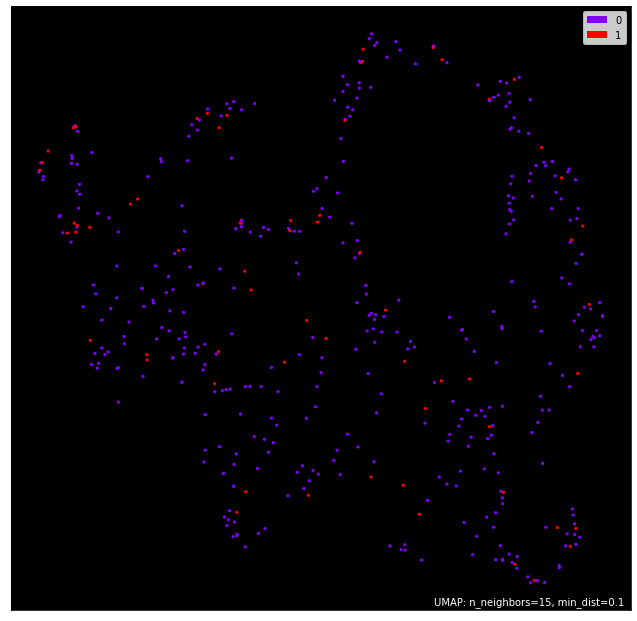

In [11]:
# pip install umap-learn[plot]
import umap
import umap.plot

mapper = umap.UMAP().fit(X) 
umap.plot.points(mapper, labels=y, theme='fire')

In [11]:
# split data
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2)

In [12]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(352, 57)
(88, 57)
(352,)
(88,)


In [56]:
# Check split distribution
y_train.value_counts(normalize=True)

0    0.84375
1    0.15625
Name: compliance_2021, dtype: float64

In [57]:
y_val.value_counts(normalize=True)

0    0.875
1    0.125
Name: compliance_2021, dtype: float64

In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [59]:
# Logistic regression
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_val,y_val)

C:\Users\kathe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7954545454545454

In [60]:
print(confusion_matrix(y_val,lr.predict(X_val)))

[[69  8]
 [10  1]]


In [63]:
submission_lr = pd.DataFrame({"station_id":df_test["station_id"], "compliance_2021": lr.predict(df_test)})
submission_lr

,station_id,compliance_2021
0,163,0
1,167,0
2,171,0
3,174,0
4,178,0
...,...,...
184,1941,1
185,2087,1
186,2206,0
187,2303,0


In [64]:
submission_lr.to_csv('lr_submission.csv',index=False)

In [65]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_val,y_val)

0.7272727272727273

In [66]:
print(confusion_matrix(y_val,dt.predict(X_val)))

[[62 15]
 [ 9  2]]


In [67]:
submission_dt = pd.DataFrame({"station_id":df_test["station_id"], "compliance_2021": dt.predict(df_test)})
submission_dt

,station_id,compliance_2021
0,163,0
1,167,1
2,171,1
3,174,0
4,178,1
...,...,...
184,1941,1
185,2087,0
186,2206,1
187,2303,1


In [68]:
submission_dt.to_csv('dt_submission.csv',index=False)

## Cool stuff

In [13]:
#pip install pycaret-ts-alpha

from pycaret.classification import *

In [15]:
clf1 = setup(data = df_train, 
             target = 'compliance_2021',
             preprocess = False,
             silent = True)

,Description,Value
0,session_id,4850
1,Target,compliance_2021
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(440, 58)"
5,Missing Values,False
6,Numeric Features,55
7,Categorical Features,2
8,Transformed Train Set,"(307, 57)"
9,Transformed Test Set,"(133, 57)"


In [16]:
top5 = compare_models(sort='AUC',
                      n_select = 5,
                      exclude=['lightgbm','xgboost','dummy','svm','ridge','knn','dt','nb','qda']
                     )

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8568,0.6885,0.0250,0.1000,0.0400,0.0256,0.0324,0.1240
et,Extra Trees Classifier,0.8502,0.6620,0.0250,0.1000,0.0400,0.0145,0.0181,0.0960
gbc,Gradient Boosting Classifier,0.8634,0.6559,0.1900,0.5000,0.2605,0.2109,0.2468,0.0610
ada,Ada Boost Classifier,0.8175,0.5858,0.0750,0.2250,0.1050,0.0299,0.0475,0.0650
lr,Logistic Regression,0.8242,0.5602,0.1000,0.1167,0.1071,0.0418,0.0384,1.8670
lda,Linear Discriminant Analysis,0.8082,0.5581,0.1600,0.2650,0.1833,0.0860,0.0957,0.0110
catboost,CatBoost Classifier,0.2572,0.2085,0.0000,0.0000,0.0000,0.0000,0.0000,0.9520


In [22]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8387,0.6846,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8065,0.7462,0.0000,0.0000,0.0000,-0.0568,-0.0801
2,0.8387,0.6885,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.8710,0.5648,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9032,0.8472,0.2500,1.0000,0.4000,0.3673,0.4743
5,0.8387,0.4444,0.0000,0.0000,0.0000,-0.0544,-0.0703
6,0.8710,0.6157,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.8667,0.8462,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8667,0.8029,0.0000,0.0000,0.0000,0.0000,0.0000


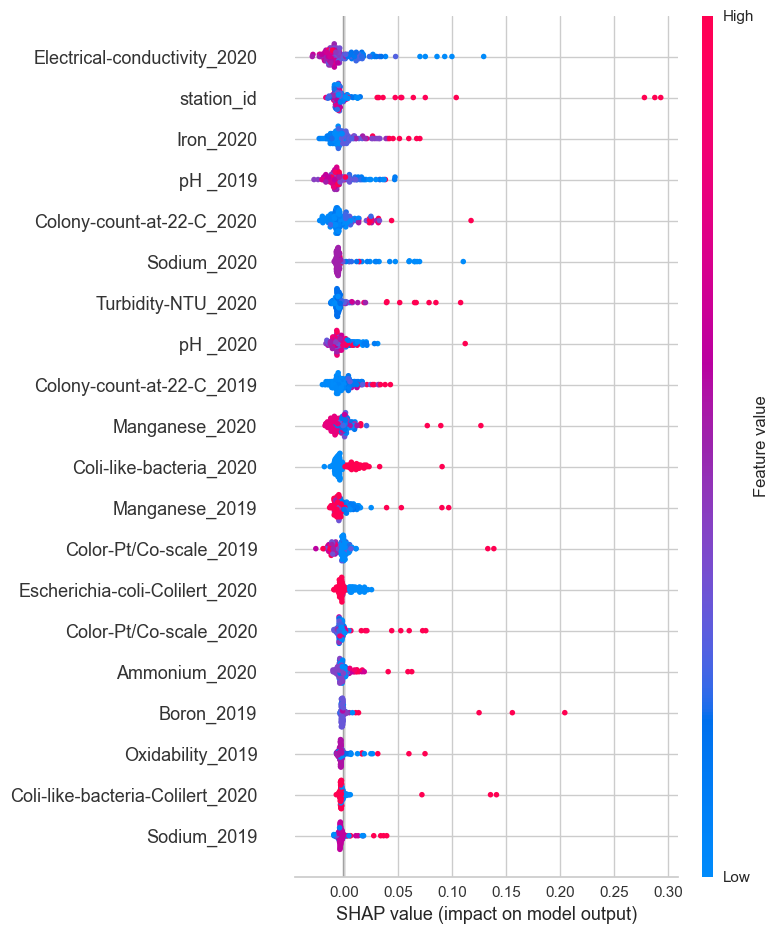

In [23]:
interpret_model(rf)